In [57]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [58]:
exp_root = "/media/yesindeed/DATADRIVE1/mount/remote_cse/experiments/med_vlm_benchmark/merged"

df_results = pd.read_csv(os.path.join(exp_root, "results_bootstrap.csv"))
# df_results = pd.read_csv(os.path.join(exp_root, "results.csv"))

df_results

,model,task,dataset,model_type,trainable_module,path,have_eval_result,have_prediction,have_gpt_score,model_family,...,precision_overall,f1_overall,exact_match_closed,recall_closed,precision_closed,f1_score_closed,accuracy_closed,gpt_score_open,gpt_score_overall,f1_score_overall
0,Qwen2-VL,vqa,SLAKE,general,NaN,vqa/SLAKE/Qwen2-VL/eval_seed0/Qwen2-VL-7B-Inst...,1,1,1,Qwen,...,0.292940,0.318349,0.658576,0.774292,0.661916,0.668470,0.779088,0.673410,0.714850,0.318534
1,Qwen25-VL,vqa,SLAKE,general,NaN,vqa/SLAKE/Qwen25-VL/eval_seed0/Qwen2.5-VL-7B-I...,1,1,1,Qwen,...,0.260505,0.274167,0.627633,0.747762,0.629873,0.634036,0.754682,0.649750,0.690877,0.274209
2,Gemma3,vqa,SLAKE,general,NaN,vqa/SLAKE/Gemma3/eval_seed0/gemma-3-4b-it,1,1,1,Gemma,...,0.038331,0.056352,0.071238,0.657399,0.073495,0.097916,0.720723,0.652927,0.679506,0.056502
3,MedGemma,vqa,SLAKE,medical,NaN,vqa/SLAKE/MedGemma/eval_seed0/medgemma-4b-it,1,1,1,Gemma,...,0.250334,0.265892,0.596903,0.726500,0.598881,0.603805,0.769371,0.759668,0.763464,0.265693
4,InternVL3,vqa,SLAKE,general,NaN,vqa/SLAKE/InternVL3/eval_seed0/InternVL3-8B-hf,1,1,1,Intern,...,0.102121,0.128382,0.209114,0.711309,0.212296,0.238496,0.744927,0.675340,0.702622,0.128349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,VILA,vqa,VQA-RAD,general,ML,vqa/VQA-RAD/VILA1.5/eval_seed0/1epoch-lora8,1,1,1,VILA,...,0.484766,0.472669,0.637849,0.637849,0.637849,0.637849,0.637849,0.448076,0.553582,0.472417
84,VILA-M3,vqa,VQA-RAD,medical,ML,vqa/VQA-RAD/VILA-M3/eval_seed0/1epoch-lora8,1,1,1,VILA,...,0.369967,0.379170,0.537973,0.537973,0.537973,0.537973,0.537973,0.467230,0.506522,0.378829
85,Lingshu,vqa,Harvard-FairVLMed10k,medical,ML,vqa/Harvard-FairVLMed10k/Lingshu/eval_seed0/1e...,1,1,1,Qwen,...,0.580966,0.580271,0.739088,0.739088,0.739088,0.739088,0.739088,0.572615,0.655800,0.580334
86,VILA,vqa,Harvard-FairVLMed10k,general,ML,vqa/Harvard-FairVLMed10k/VILA1.5/eval_seed0/1e...,1,1,1,VILA,...,0.667989,0.647041,0.811056,0.811056,0.811056,0.811056,0.811056,0.560974,0.685936,0.647008


In [59]:
df_results["trainable_module"].fillna(value="ZS", inplace=True)

/tmp/ipykernel_1078042/109891910.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_results["trainable_module"].fillna(value="ZS", inplace=True)


In [60]:
df_results["dataset+tune_module"] = df_results["dataset"] + \
    "-" + df_results["trainable_module"]
df_results

,model,task,dataset,model_type,trainable_module,path,have_eval_result,have_prediction,have_gpt_score,model_family,...,f1_overall,exact_match_closed,recall_closed,precision_closed,f1_score_closed,accuracy_closed,gpt_score_open,gpt_score_overall,f1_score_overall,dataset+tune_module
0,Qwen2-VL,vqa,SLAKE,general,ZS,vqa/SLAKE/Qwen2-VL/eval_seed0/Qwen2-VL-7B-Inst...,1,1,1,Qwen,...,0.318349,0.658576,0.774292,0.661916,0.668470,0.779088,0.673410,0.714850,0.318534,SLAKE-ZS
1,Qwen25-VL,vqa,SLAKE,general,ZS,vqa/SLAKE/Qwen25-VL/eval_seed0/Qwen2.5-VL-7B-I...,1,1,1,Qwen,...,0.274167,0.627633,0.747762,0.629873,0.634036,0.754682,0.649750,0.690877,0.274209,SLAKE-ZS
2,Gemma3,vqa,SLAKE,general,ZS,vqa/SLAKE/Gemma3/eval_seed0/gemma-3-4b-it,1,1,1,Gemma,...,0.056352,0.071238,0.657399,0.073495,0.097916,0.720723,0.652927,0.679506,0.056502,SLAKE-ZS
3,MedGemma,vqa,SLAKE,medical,ZS,vqa/SLAKE/MedGemma/eval_seed0/medgemma-4b-it,1,1,1,Gemma,...,0.265892,0.596903,0.726500,0.598881,0.603805,0.769371,0.759668,0.763464,0.265693,SLAKE-ZS
4,InternVL3,vqa,SLAKE,general,ZS,vqa/SLAKE/InternVL3/eval_seed0/InternVL3-8B-hf,1,1,1,Intern,...,0.128382,0.209114,0.711309,0.212296,0.238496,0.744927,0.675340,0.702622,0.128349,SLAKE-ZS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,VILA,vqa,VQA-RAD,general,ML,vqa/VQA-RAD/VILA1.5/eval_seed0/1epoch-lora8,1,1,1,VILA,...,0.472669,0.637849,0.637849,0.637849,0.637849,0.637849,0.448076,0.553582,0.472417,VQA-RAD-ML
84,VILA-M3,vqa,VQA-RAD,medical,ML,vqa/VQA-RAD/VILA-M3/eval_seed0/1epoch-lora8,1,1,1,VILA,...,0.379170,0.537973,0.537973,0.537973,0.537973,0.537973,0.467230,0.506522,0.378829,VQA-RAD-ML
85,Lingshu,vqa,Harvard-FairVLMed10k,medical,ML,vqa/Harvard-FairVLMed10k/Lingshu/eval_seed0/1e...,1,1,1,Qwen,...,0.580271,0.739088,0.739088,0.739088,0.739088,0.739088,0.572615,0.655800,0.580334,Harvard-FairVLMed10k-ML
86,VILA,vqa,Harvard-FairVLMed10k,general,ML,vqa/Harvard-FairVLMed10k/VILA1.5/eval_seed0/1e...,1,1,1,VILA,...,0.647041,0.811056,0.811056,0.811056,0.811056,0.811056,0.560974,0.685936,0.647008,Harvard-FairVLMed10k-ML


In [61]:
model_order = [
    "o3",
    "gemini-2.5-pro",
    "LLaVA-1.5",
    "LLaVA-Med",
    "Qwen2-VL",
    "Qwen25-VL",
    "Lingshu",
    "Gemma3",
    "MedGemma",
    # "VILA",
    # "VILA-M3",
    "InternVL3",
]

data_order = [
    "VQA-RAD-ZS",
    "VQA-RAD-ML",
    "PathVQA-ZS",
    "PathVQA-ML",
    "SLAKE-ZS",
    "SLAKE-ML",
    "Harvard-FairVLMed10k-ZS",
    "Harvard-FairVLMed10k-ML",
]

# metric = "gpt_score_overall"
metric = "f1_score_overall"
df_plot = df_results.copy(deep=True)
df_plot = df_plot.loc[~df_plot["model"].isin(["VILA", "VILA-M3"])]

df_plot[metric] = df_plot[metric] * 100

data_heatmap = df_plot.pivot(
    index="model", columns="dataset+tune_module", values=metric)
data_heatmap = data_heatmap.reindex(model_order, axis=0)
data_heatmap = data_heatmap.reindex(data_order, axis=1)
data_heatmap

dataset+tune_module,VQA-RAD-ZS,VQA-RAD-ML,PathVQA-ZS,PathVQA-ML,SLAKE-ZS,SLAKE-ML,Harvard-FairVLMed10k-ZS,Harvard-FairVLMed10k-ML
model,,,,,,,,
o3,20.691890,NaN,33.452585,NaN,32.635373,NaN,35.309818,NaN
gemini-2.5-pro,35.205946,NaN,39.426887,NaN,29.810217,NaN,36.703704,NaN
LLaVA-1.5,32.441655,52.126549,28.656359,63.582252,27.383671,82.382648,35.301811,67.068577
LLaVA-Med,12.587363,56.411926,7.447749,56.355810,11.021990,78.199494,23.931061,64.605366
Qwen2-VL,44.772120,60.732791,35.520578,65.333852,31.853420,84.198544,41.048821,67.843441
Qwen25-VL,40.401387,62.968463,20.621532,64.876750,27.420919,84.838291,15.867383,66.814676
Lingshu,44.423893,50.612068,43.473677,35.457248,39.895324,66.582706,45.085059,58.033441
Gemma3,4.572621,47.938070,4.072800,58.085524,5.650196,77.425802,9.345526,66.094904
MedGemma,36.238175,59.599947,28.422465,66.223623,26.569343,87.143170,24.769662,66.536187


In [62]:
OOD_datasets = ["Harvard-FairVLMed10k"]

RQ_data = []

for model_family, family_group in df_plot.groupby("model_family"):
    for dataset, dataset_group in family_group.groupby("dataset"):
        ft_subdf = dataset_group.loc[dataset_group["trainable_module"] == "ML"]
        ft_med_subdf = ft_subdf.loc[ft_subdf["model_type"] == "medical"]
        ft_gen_subdf = ft_subdf.loc[ft_subdf["model_type"] == "general"]
        if dataset not in OOD_datasets:
            if dataset == "SLAKE" and model_family == "LLaVA":
                temp = dataset_group
            zs_subdf = dataset_group.loc[dataset_group["trainable_module"] == "ZS"]

            zs_med_subdf = zs_subdf.loc[zs_subdf["model_type"] == "medical"]
            zs_gen_subdf = zs_subdf.loc[zs_subdf["model_type"] == "general"]

            rq1_gap = zs_gen_subdf[metric].max() - zs_med_subdf[metric].max()
            rq2_gap = ft_gen_subdf[metric].max() - zs_med_subdf[metric].max()
            RQ_data.extend(
                [
                    {"model_family": model_family, "dataset": dataset,
                        "RQ": "RQ1", "value": rq1_gap},
                    {"model_family": model_family, "dataset": dataset,
                        "RQ": "RQ2", "value": rq2_gap},
                ]
            )

        else:
            rq3_gap = ft_gen_subdf[metric].max() - ft_med_subdf[metric].max()
            RQ_data.append({"model_family": model_family,
                           "dataset": dataset, "RQ": "RQ3", "value": rq3_gap})

df_rq = pd.DataFrame(RQ_data).dropna()
df_rq["RQ"] = pd.Categorical(df_rq["RQ"], ["RQ1", "RQ2", "RQ3"])
df_rq

,model_family,dataset,RQ,value
7,Gemma,Harvard-FairVLMed10k,RQ3,-0.441283
8,Gemma,PathVQA,RQ1,-24.349665
9,Gemma,PathVQA,RQ2,29.663059
10,Gemma,SLAKE,RQ1,-20.919146
11,Gemma,SLAKE,RQ2,50.856459
12,Gemma,VQA-RAD,RQ1,-31.665554
13,Gemma,VQA-RAD,RQ2,11.699895
21,LLaVA,Harvard-FairVLMed10k,RQ3,2.463211
22,LLaVA,PathVQA,RQ1,21.208610
23,LLaVA,PathVQA,RQ2,56.134503


In [63]:
def get_model_family_rq(df_rq, model_family):
    df_sub = df_rq.loc[df_rq["model_family"] == model_family]

    rq1 = df_sub.loc[df_sub["RQ"] == "RQ1"]["value"].tolist()
    rq2 = df_sub.loc[df_sub["RQ"] == "RQ2"]["value"].tolist()
    rq3 = df_sub.loc[df_sub["RQ"] == "RQ3"]["value"].tolist()

    rq1_datasets = df_sub.loc[df_sub["RQ"] == "RQ1"]["dataset"].tolist()
    rq2_datasets = df_sub.loc[df_sub["RQ"] == "RQ2"]["dataset"].tolist()
    rq3_datasets = df_sub.loc[df_sub["RQ"] == "RQ3"]["dataset"].tolist()

    return rq1, rq2, rq3, rq1_datasets, rq2_datasets, rq3_datasets

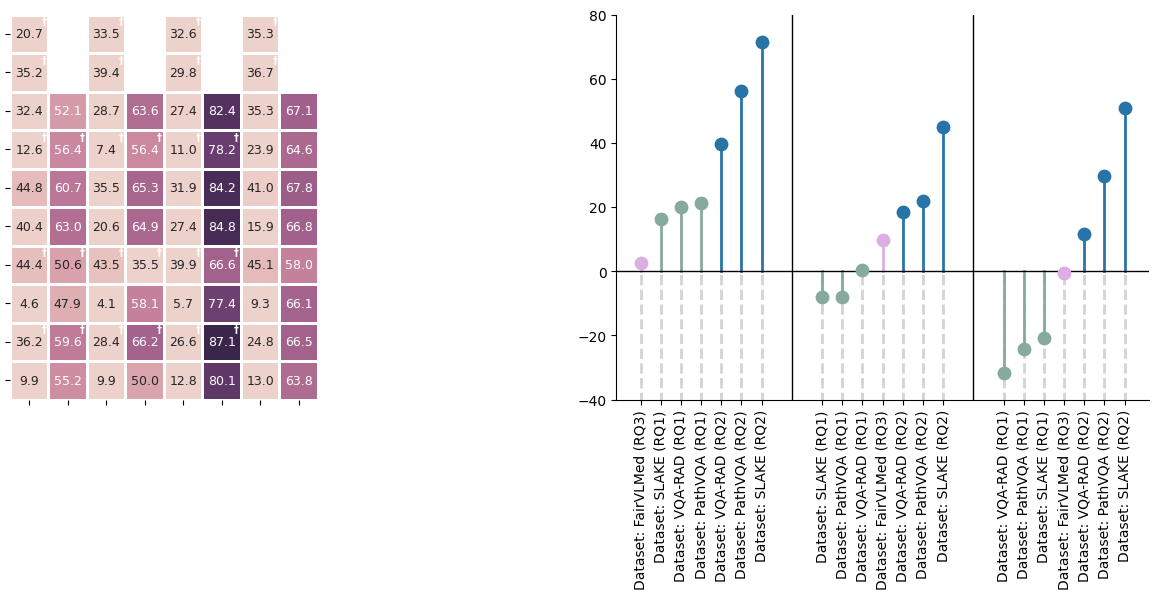

In [66]:
from copy import deepcopy


# left plot
def prepare_annot_for_heatmap(data):
    annot = np.array(data).copy()
    for i in range(annot.shape[0]):
        for j in range(annot.shape[1]):
            annot[i, j] = "{:.1f}".format(float(annot[i, j]))
    return annot


fig, axes = plt.subplots(1, 2, figsize=(17, 5), gridspec_kw={"width_ratios": [1, 0.8]})

heat = sns.heatmap(
    data_heatmap,
    cbar=False,
    cmap=sns.cubehelix_palette(as_cmap=True),
    annot=prepare_annot_for_heatmap(data_heatmap),
    ax=axes[0],
    yticklabels=False,
    xticklabels=False,
    fmt="",
    square=True,
    linewidths=0.8,
    annot_kws={"size": 9},
    vmin=40,
    vmax=90,
)

mask = np.zeros_like(data_heatmap, dtype=bool)
mask[:, -1] = True
mask[:, -2] = True
mask[2] = True
mask[4] = True
mask[5] = True
mask[7] = True
mask[9] = True
mask[0] = False
mask[1] = False

# Add asterisks to the specified cells
for i in range(data_heatmap.shape[0]):
    for j in range(data_heatmap.shape[1]):
        if not mask[i, j]:  # Check if the cell is marked for asterisk
            axes[0].text(
                j + 0.88,  # Adjust position slightly to the right of the cell
                i + 0.18,  # Center vertically
                "†",
                color="white",  # Asterisk color (contrast with heatmap)
                fontsize=7,
                ha="center",
                va="center",
                weight="bold",
            )

axes[0].tick_params(right=False, left=True, labelleft=False)
axes[0].set_yticks(np.arange(10) + 0.5)
axes[0].set_xticks(np.arange(8) + 0.5)
axes[0].set_xlabel("")
axes[0].set_ylabel("")

# right plot
familys = [
    "LLaVA",
    "Qwen",
    "Gemma",
]

rq_gap_x = 1
dataset_gap_x = 1
family_gap_x = 3
bar_width = 0.25

rq_colors = [
    "#86aaa0",
    "#2874a6",
    "#ddaee4",
]

current_x = 1
xticks = []
xtick_labels = []

dataset_map = {"Harvard-FairVLMed10k": "FairVLMed"}

for i, family in enumerate(familys):
    rq1, rq2, rq3, rq1_datasets, rq2_datasets, rq3_datasets = get_model_family_rq(df_rq, family)

    def plot_rq_sorted(rq_values, rqs, datasets, colors, current_x=0):
        indices_sorted = np.argsort(rq_values)

        for index in indices_sorted:
            axes[1].plot([current_x, current_x], [0, rq_values[index]], c=colors[index], zorder=1, lw=2)
            # axes[1].vline(x=current_x, color="lightgray", ls="--", )
            axes[1].vlines(x=current_x, ymin=-50, ymax=0, color="lightgray", ls="--", zorder=0, lw=2)
            axes[1].scatter([current_x], [rq_values[index]], c=colors[index], edgecolors=colors[index], s=80, zorder=2)
            xticks.append(current_x)
             dataset_show = dataset_map[datasets[index]] if datasets[index] in dataset_map.keys() else datasets[index]
            xtick_labels.append(f"Dataset: {dataset_show} (RQ{rqs[index][-1]})")
            current_x += dataset_gap_x

        current_x -= dataset_gap_x

        return current_x

    rq_values = rq1 + rq2 + rq3
    rqs = ["RQ1"] * len(rq1) + ["RQ2"] * len(rq2) + ["RQ3"] * len(rq3)
    rq_datasets = rq1_datasets + rq2_datasets + rq3_datasets
    colors = [rq_colors[0]] * len(rq1) + [rq_colors[1]] * len(rq2) + [rq_colors[2]] * len(rq2)
    current_x = plot_rq_sorted(rq_values, rqs, rq_datasets, colors, current_x=current_x)

    if i < 2:
        axes[1].axvline(x=current_x + family_gap_x / 2, color="black", ls="-", zorder=0, lw=1)
    current_x += family_gap_x

    # def plot_rq(rqs, datasets, color="red", current_x=0):
    #     for rq_value, rq_dataset in zip(rqs, datasets):
    #         # axes[i + 1].plot([current_x, current_x],
    #         #                  [0, rq_value], c=color, zorder=0)
    #         axes[i + 1].bar([current_x], [rq_value],
    #                         color=color, width=bar_width, zorder=0)
    #         axes[i + 1].scatter([current_x], [rq_value],
    #                             c=color, edgecolors="black", s=30, zorder=1)
    #         current_x += dataset_gap_x
    #     current_x += rq_gap_x
    #     return current_x

    # current_x = plot_rq(rq1, rq1_datasets, current_x=current_x)
    # current_x = plot_rq(rq2, rq2_datasets, current_x=current_x)
    # current_x = plot_rq(rq3, rq3_datasets, current_x=current_x)

axes[1].spines["top"].set_visible(False)
# axes[1].spines["bottom"].set_visible(False)
axes[1].spines["right"].set_visible(False)
# for location in ['left', 'right', 'top', 'bottom']:
#     axes[1].spines[location].set_linewidth(2)

axes[1].set_xticks(xticks)
axes[1].set_xticklabels(xtick_labels)
axes[1].set_xticklabels([])
axes[1].axhline(y=0, color="black", ls="-", lw=1, zorder=1)
axes[1].tick_params(axis="x", rotation=90)
axes[1].set_ylim([-15, 35])
# axes[1].set_ylim([-40, 80])


plt.savefig(
    "heatmap/vqa_v2.png",
    dpi=1000,
    bbox_inches="tight",
)

In [233]:
model_order = [
    "LLaVA-1.5",
    "LLaVA-Med",
    "Qwen2-VL",
    "Qwen25-VL",
    "Lingshu",
    "Gemma3",
    "MedGemma",
    "VILA",
    "VILA-M3",
    "InternVL3",
]

data_order = [
    "VQA-RAD-ZS",
    "VQA-RAD-ML",
    "PathVQA-ZS",
    "PathVQA-ML",
    "SLAKE-ZS",
    "SLAKE-ML",
    "Harvard-FairVLMed10k-ZS",
    "Harvard-FairVLMed10k-ML",
]

data_heatmap = df_results.pivot(index="model", columns="dataset+tune_module", values="f1_overall")
data_heatmap = data_heatmap.reindex(model_order, axis=0)
data_heatmap = data_heatmap.reindex(data_order, axis=1)
data_heatmap

dataset+tune_module,VQA-RAD-ZS,VQA-RAD-ML,PathVQA-ZS,PathVQA-ML,SLAKE-ZS,SLAKE-ML,Harvard-FairVLMed10k-ZS,Harvard-FairVLMed10k-ML
model,,,,,,,,
LLaVA-1.5,0.323650,0.521257,0.286373,0.635573,0.273775,0.824140,0.352984,0.670534
LLaVA-Med,0.125846,0.564234,0.074496,0.563337,0.110219,0.782252,0.239254,0.645982
Qwen2-VL,0.447765,0.608376,0.355122,0.653005,0.318349,0.841718,0.410381,0.678358
Qwen25-VL,0.405327,0.630821,0.206231,0.648496,0.274167,0.848436,0.158831,0.667944
Lingshu,0.444689,0.506925,0.434498,0.354604,0.399380,0.665505,0.450496,0.580271
Gemma3,0.045758,0.480233,0.040720,0.580459,0.056352,0.773920,0.093368,0.660831
MedGemma,0.362130,0.595927,0.284133,0.662073,0.265892,0.871278,0.247693,0.665430
VILA,0.358242,0.472669,0.273644,0.537576,0.269113,0.637926,0.479477,0.647041
VILA-M3,0.770280,0.379170,0.630211,0.452742,0.889207,0.329168,0.356481,0.338911
